<a href="https://colab.research.google.com/github/AyaElsawyElghaysh/DeepLearing/blob/main/Reuters_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
from google.colab.patches import cv2_imshow
import cv2 as cv 
import numpy as np 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Activation,Dropout,Input,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Reuters dataset from keras
newswires and thier topics

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
len(X_train)

8982

In [4]:
len(X_test)

2246

In [6]:
word_index=keras.datasets.reuters.get_word_index() #get index of each word
#map indices to words
word_from_index=dict([(v,k) for k,v in word_index.items()])
#there are there indices reserved 0 for padding and 1 for start of sequence 3 for unkown
review_decoded=' '.join([word_from_index.get(i-3,'?') for i in X_train[0]])

565248/550378 [==============================] - 0s 0us/step


In [7]:
review_decoded

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

#Verctorization

In [8]:
#we cannot deal with indices in NN  so we will use bag of words
def vectorization(reviews,dimension=10000):
  #create matrix of size len(reviews)*dimension 
  matrix_words=np.zeros((len(reviews),dimension))
  for i,r in enumerate(reviews):
     #print(i,r)
     matrix_words[i,r]=1
  return matrix_words
       

In [9]:
x_train=vectorization(X_train)
x_test=vectorization(X_test)

#we have 46 class in out target labels so use to_categorical or implement it from scratch 

In [10]:
def to_one_hot_encoding(labels,classdim=46):
    labels_class=np.zeros((len(labels),classdim))
    for i,l  in enumerate(labels):
          labels_class[i,l]=1
    return labels_class

In [11]:
train_y=to_one_hot_encoding(y_train)
test_y=to_one_hot_encoding(y_test)

In [12]:
train_y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
len(train_y[0])

46

## Modeling

In [14]:
model=Sequential()
model.add(Dense(64,activation="relu",input_shape=(10000,)))
model.add(Dense(64,activation="relu"))
model.add(Dense(46,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [16]:
x_val,x_test,y_val,y_test=train_test_split(x_train,train_y,train_size=.8,shuffle=True)

In [17]:
#training
history_1=model.fit(x_val,y_val,epochs=15,validation_data=(x_test,y_test),batch_size=512)

Epoch 1/15
15/15 [==============================] - 2s 63ms/step - loss: 3.1817 - accuracy: 0.4498 - val_loss: 2.4917 - val_accuracy: 0.5092
Epoch 2/15
15/15 [==============================] - 1s 59ms/step - loss: 1.9327 - accuracy: 0.6051 - val_loss: 1.7311 - val_accuracy: 0.6283
Epoch 3/15
15/15 [==============================] - 1s 59ms/step - loss: 1.3706 - accuracy: 0.7013 - val_loss: 1.4513 - val_accuracy: 0.6767
Epoch 4/15
15/15 [==============================] - 1s 52ms/step - loss: 1.0891 - accuracy: 0.7670 - val_loss: 1.3127 - val_accuracy: 0.7095
Epoch 5/15
15/15 [==============================] - 1s 49ms/step - loss: 0.8850 - accuracy: 0.8156 - val_loss: 1.2155 - val_accuracy: 0.7429
Epoch 6/15
15/15 [==============================] - 1s 47ms/step - loss: 0.7169 - accuracy: 0.8576 - val_loss: 1.1450 - val_accuracy: 0.7629
Epoch 7/15
15/15 [==============================] - 1s 48ms/step - loss: 0.5859 - accuracy: 0.8855 - val_loss: 1.0882 - val_accuracy: 0.7730
Epoch 8/15
15

In [ ]:
#overfitting we will overcome this later

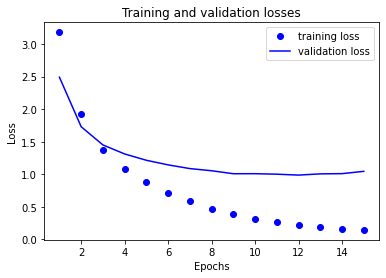

In [19]:
import matplotlib.pyplot as plt
acc=history_1.history["accuracy"]
val=history_1.history["val_accuracy"]
loss=history_1.history["loss"]
val_loss=history_1.history["val_loss"]
epochs=range(1,len(acc)+1)
#plot epochs with loss and val loss
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title("Training and validation losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

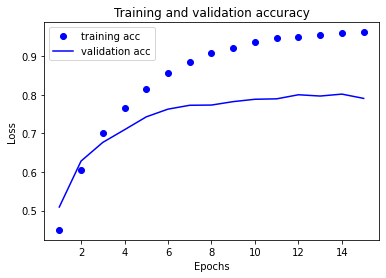

In [21]:
acc=history_1.history["accuracy"]
val=history_1.history["val_accuracy"]
loss=history_1.history["loss"]
val_loss=history_1.history["val_loss"]
epochs=range(1,len(acc)+1)
#plot epochs with loss and val loss
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val,'b',label='validation acc')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## prediction 

In [24]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [27]:
predictions=model.predict(x_test)

In [28]:
np.argmax(predictions[0])

4